In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
features_train = pd.read_csv('features_train_metro_lagged.csv')
features_test = pd.read_csv('features_test_metro_lagged.csv')
labels_train = pd.read_csv('labels_train_metro_lagged.csv')
labels_test = pd.read_csv('labels_test_metro_lagged.csv')

In [3]:
gbm = GradientBoostingRegressor()
gbm.set_params(verbose=1)
gbm.fit(features_train,labels_train)

/Users/ayelethillel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


      Iter       Train Loss   Remaining Time 
         1      545373.3828           35.02s
         2      448390.1615           34.99s
         3      369585.4627           35.39s
         4      305181.4030           35.31s
         5      252422.5489           35.56s
         6      209490.0181           37.52s
         7      174458.8509           38.88s
         8      145974.6646           40.50s
         9      122463.1647           39.89s
        10      103388.7858           39.54s
        20       27151.3043           32.99s
        30       13672.0927           28.84s
        40        9334.7614           24.91s
        50        6923.4951           20.44s
        60        5462.6689           16.06s
        70        4691.3771           12.07s
        80        4318.7245            8.10s
        90        4036.0564            4.07s
       100        3819.4087            0.00s


GradientBoostingRegressor(verbose=1)

In [4]:
print('The train R^2 is %.3f' %(gbm.score(features_train,labels_train)))

The train R^2 is 0.994


In [5]:
print('The test R^2 is %.3f' %(gbm.score(features_test,labels_test)))

The test R^2 is 0.986


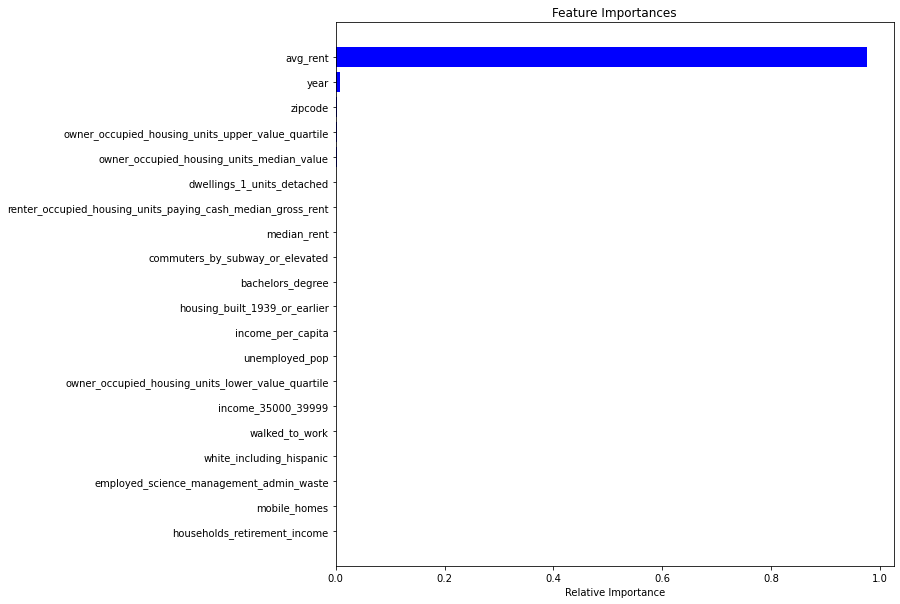

In [23]:
features = features_test.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
data = pd.read_csv('data_final_for_real.csv')
data = data.drop(columns=['rent_in_2y', 'rent_in_3y', 'rent_in_4y', 'rent_in_5y'])
data = data.drop(columns=['zipcode', 'City', 'CountyName', 'Metro', 'CSBA'])
data = data.dropna()
data

,year,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,...,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y
0,2013,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,...,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000,10922.0,7263.0,3659.0,4123.250000
1,2014,4123.250000,0.028940,0.141141,0.097703,0.127501,0.080996,0.036938,0.109005,0.130222,...,39773.0,3190.0,47822.0,474.0,0.000750,254.333333,10001.0,6285.0,3716.0,4520.250000
2,2015,4520.250000,0.029400,0.135949,0.105821,0.123141,0.082728,0.035919,0.106443,0.137299,...,43679.0,3230.0,48895.0,315.0,0.010684,239.666667,13386.0,8582.0,4804.0,4492.916667
3,2016,4492.916667,0.027901,0.146379,0.105018,0.120388,0.084793,0.033846,0.103072,0.138453,...,48090.0,3210.0,47713.0,299.0,0.010200,303.333333,14787.0,9820.0,4967.0,4231.416667
4,2017,4231.416667,0.026190,0.131302,0.108329,0.122007,0.085002,0.039514,0.099599,0.146801,...,59023.0,3370.0,51307.0,578.0,-0.013035,346.666667,16952.0,12175.0,4777.0,4245.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2016,1044.416667,0.119136,0.054938,0.056173,0.156790,0.082099,0.196296,0.043827,0.040741,...,88.0,40.0,182.0,698.0,-0.028363,663.000000,10921.0,2084.0,8837.0,1036.700000
4558,2017,1036.700000,0.143990,0.052471,0.065284,0.150092,0.086638,0.164124,0.045149,0.037828,...,92.0,50.0,185.0,56.0,0.036489,481.666667,14676.0,3721.0,10955.0,1170.500000
4559,2018,1170.500000,0.128265,0.032501,0.060360,0.174115,0.089379,0.174695,0.039466,0.048752,...,0.0,0.0,0.0,760.0,-0.103462,509.333333,14809.0,3218.0,11591.0,1216.727273
4563,2016,2043.272727,0.129243,0.079634,0.066580,0.218016,0.057441,0.159269,0.000000,0.060052,...,661.0,80.0,958.0,762.0,-0.088000,651.000000,7204.0,1069.0,6135.0,2094.800000


In [26]:
#prepare data to modeling 
features_test = data.loc[data['year'] == 2018]
features_train = data.loc[data['year'] != 2018]
labels_train = features_train['rent_in_1y']
labels_test = features_test['rent_in_1y']
features_train = features_train.drop('rent_in_1y', axis = 1)
features_test = features_test.drop('rent_in_1y', axis = 1)

In [27]:
gbm = GradientBoostingRegressor()
gbm.set_params(verbose=1)
gbm.fit(features_train,labels_train)

      Iter       Train Loss   Remaining Time 
         1      569433.4508           12.50s
         2      467978.7174            9.00s
         3      385192.2029            8.25s
         4      317581.3886            7.60s
         5      262347.4564            7.06s
         6      217027.7565            6.69s
         7      180248.4050            6.67s
         8      150200.1031            6.49s
         9      125465.0645            6.30s
        10      105221.4923            6.16s
        20       23947.5330            5.63s
        30        9535.9763            5.08s
        40        5754.0525            4.39s
        50        4349.5437            3.61s
        60        3663.3663            2.92s
        70        3304.6862            2.18s
        80        3069.6458            1.43s
        90        2925.6045            0.73s
       100        2769.3009            0.00s


GradientBoostingRegressor(verbose=1)

In [28]:
print('The train R^2 is %.3f' %(gbm.score(features_train,labels_train)))

The train R^2 is 0.996


In [29]:
print('The test R^2 is %.3f' %(gbm.score(features_test,labels_test)))

The test R^2 is 0.884


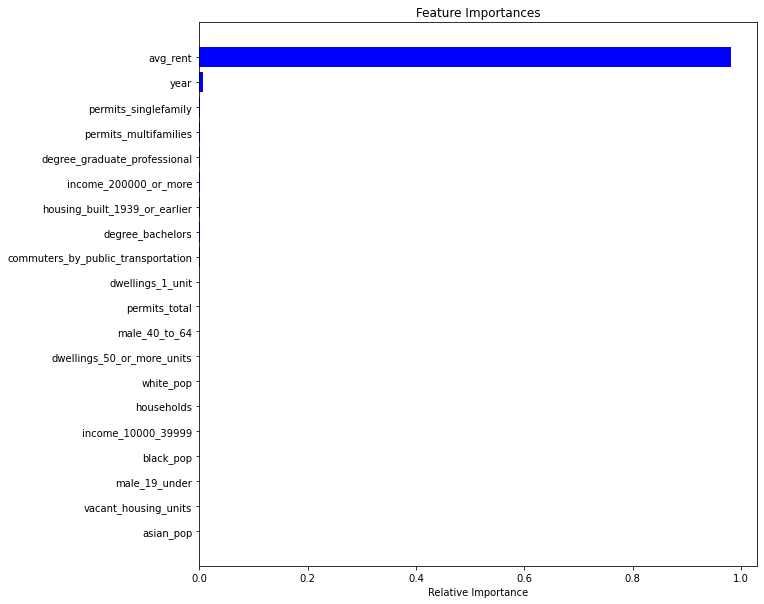

In [30]:
features = features_test.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
features_train = features_train.drop('avg_rent', axis = 1)
features_test = features_test.drop('avg_rent', axis = 1)

In [33]:
gbm.fit(features_train,labels_train)

      Iter       Train Loss   Remaining Time 
         1      595282.2112            9.30s
         2      513951.0769            9.00s
         3      447159.3275            9.34s
         4      392241.2088            8.24s
         5      346686.0802            7.59s
         6      307861.9959            7.14s
         7      276334.2568            6.85s
         8      250077.3923            6.66s
         9      227525.2049            6.41s
        10      208878.2617            6.20s
        20      116844.9161            5.16s
        30       88016.6459            4.74s
        40       71884.4261            4.05s
        50       63271.7939            3.53s
        60       56563.9789            2.83s
        70       52563.0926            2.13s
        80       47357.1452            1.40s
        90       42899.9212            0.71s
       100       40206.5411            0.00s


GradientBoostingRegressor(verbose=1)

In [34]:
print('The train R^2 is %.3f' %(gbm.score(features_train,labels_train)))

The train R^2 is 0.942


In [35]:
print('The test R^2 is %.3f' %(gbm.score(features_test,labels_test)))

The test R^2 is 0.876


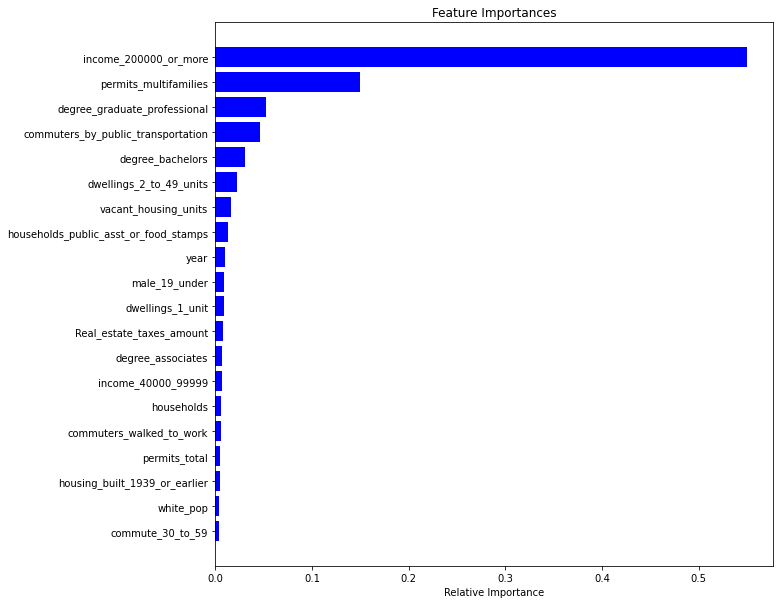

In [36]:
features = features_test.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()